# Draw phylogenies of Ireland and global M. bovis samples

<div class="alert alert-block alert-info"><b>R Script to draw trees</b> </div>

In [273]:
setwd('/home/farrell/gitprojects/snipgenie/notebooks')
source('drawtrees.R')

In [267]:
options(repr.plot.width=22, repr.plot.height=15)

In [274]:
gltree <- read.tree('/storage/btbgenie/global_results/tree.newick')
glmeta <- read.table('/storage/btbgenie/global_results/metadata.csv',sep=',',
                      header=TRUE,row.names=1)
glmeta[] <- lapply(glmeta, as.character)

iremeta <- read.table('/storage/btbgenie/all_ireland_results/metadata.csv',sep=',',
                      header=TRUE,row.names=1)
iremeta[] <- lapply(iremeta, as.character)
print (length(rownames(iremeta)))
iretree <- read.tree('/storage/btbgenie/all_ireland_results/tree.newick')

cmeta <- read.table('/storage/btbgenie/combined_results/metadata.csv',sep=',',header=TRUE,row.names=2)
cmeta[] <- lapply(cmeta, as.character)
#cmeta[is.na(cmeta)] <- "-"
#cmeta[] <- lapply(meta, as.character)
combtree <- read.tree('/storage/btbgenie/combined_results/tree.newick')

[1] 1435


## global

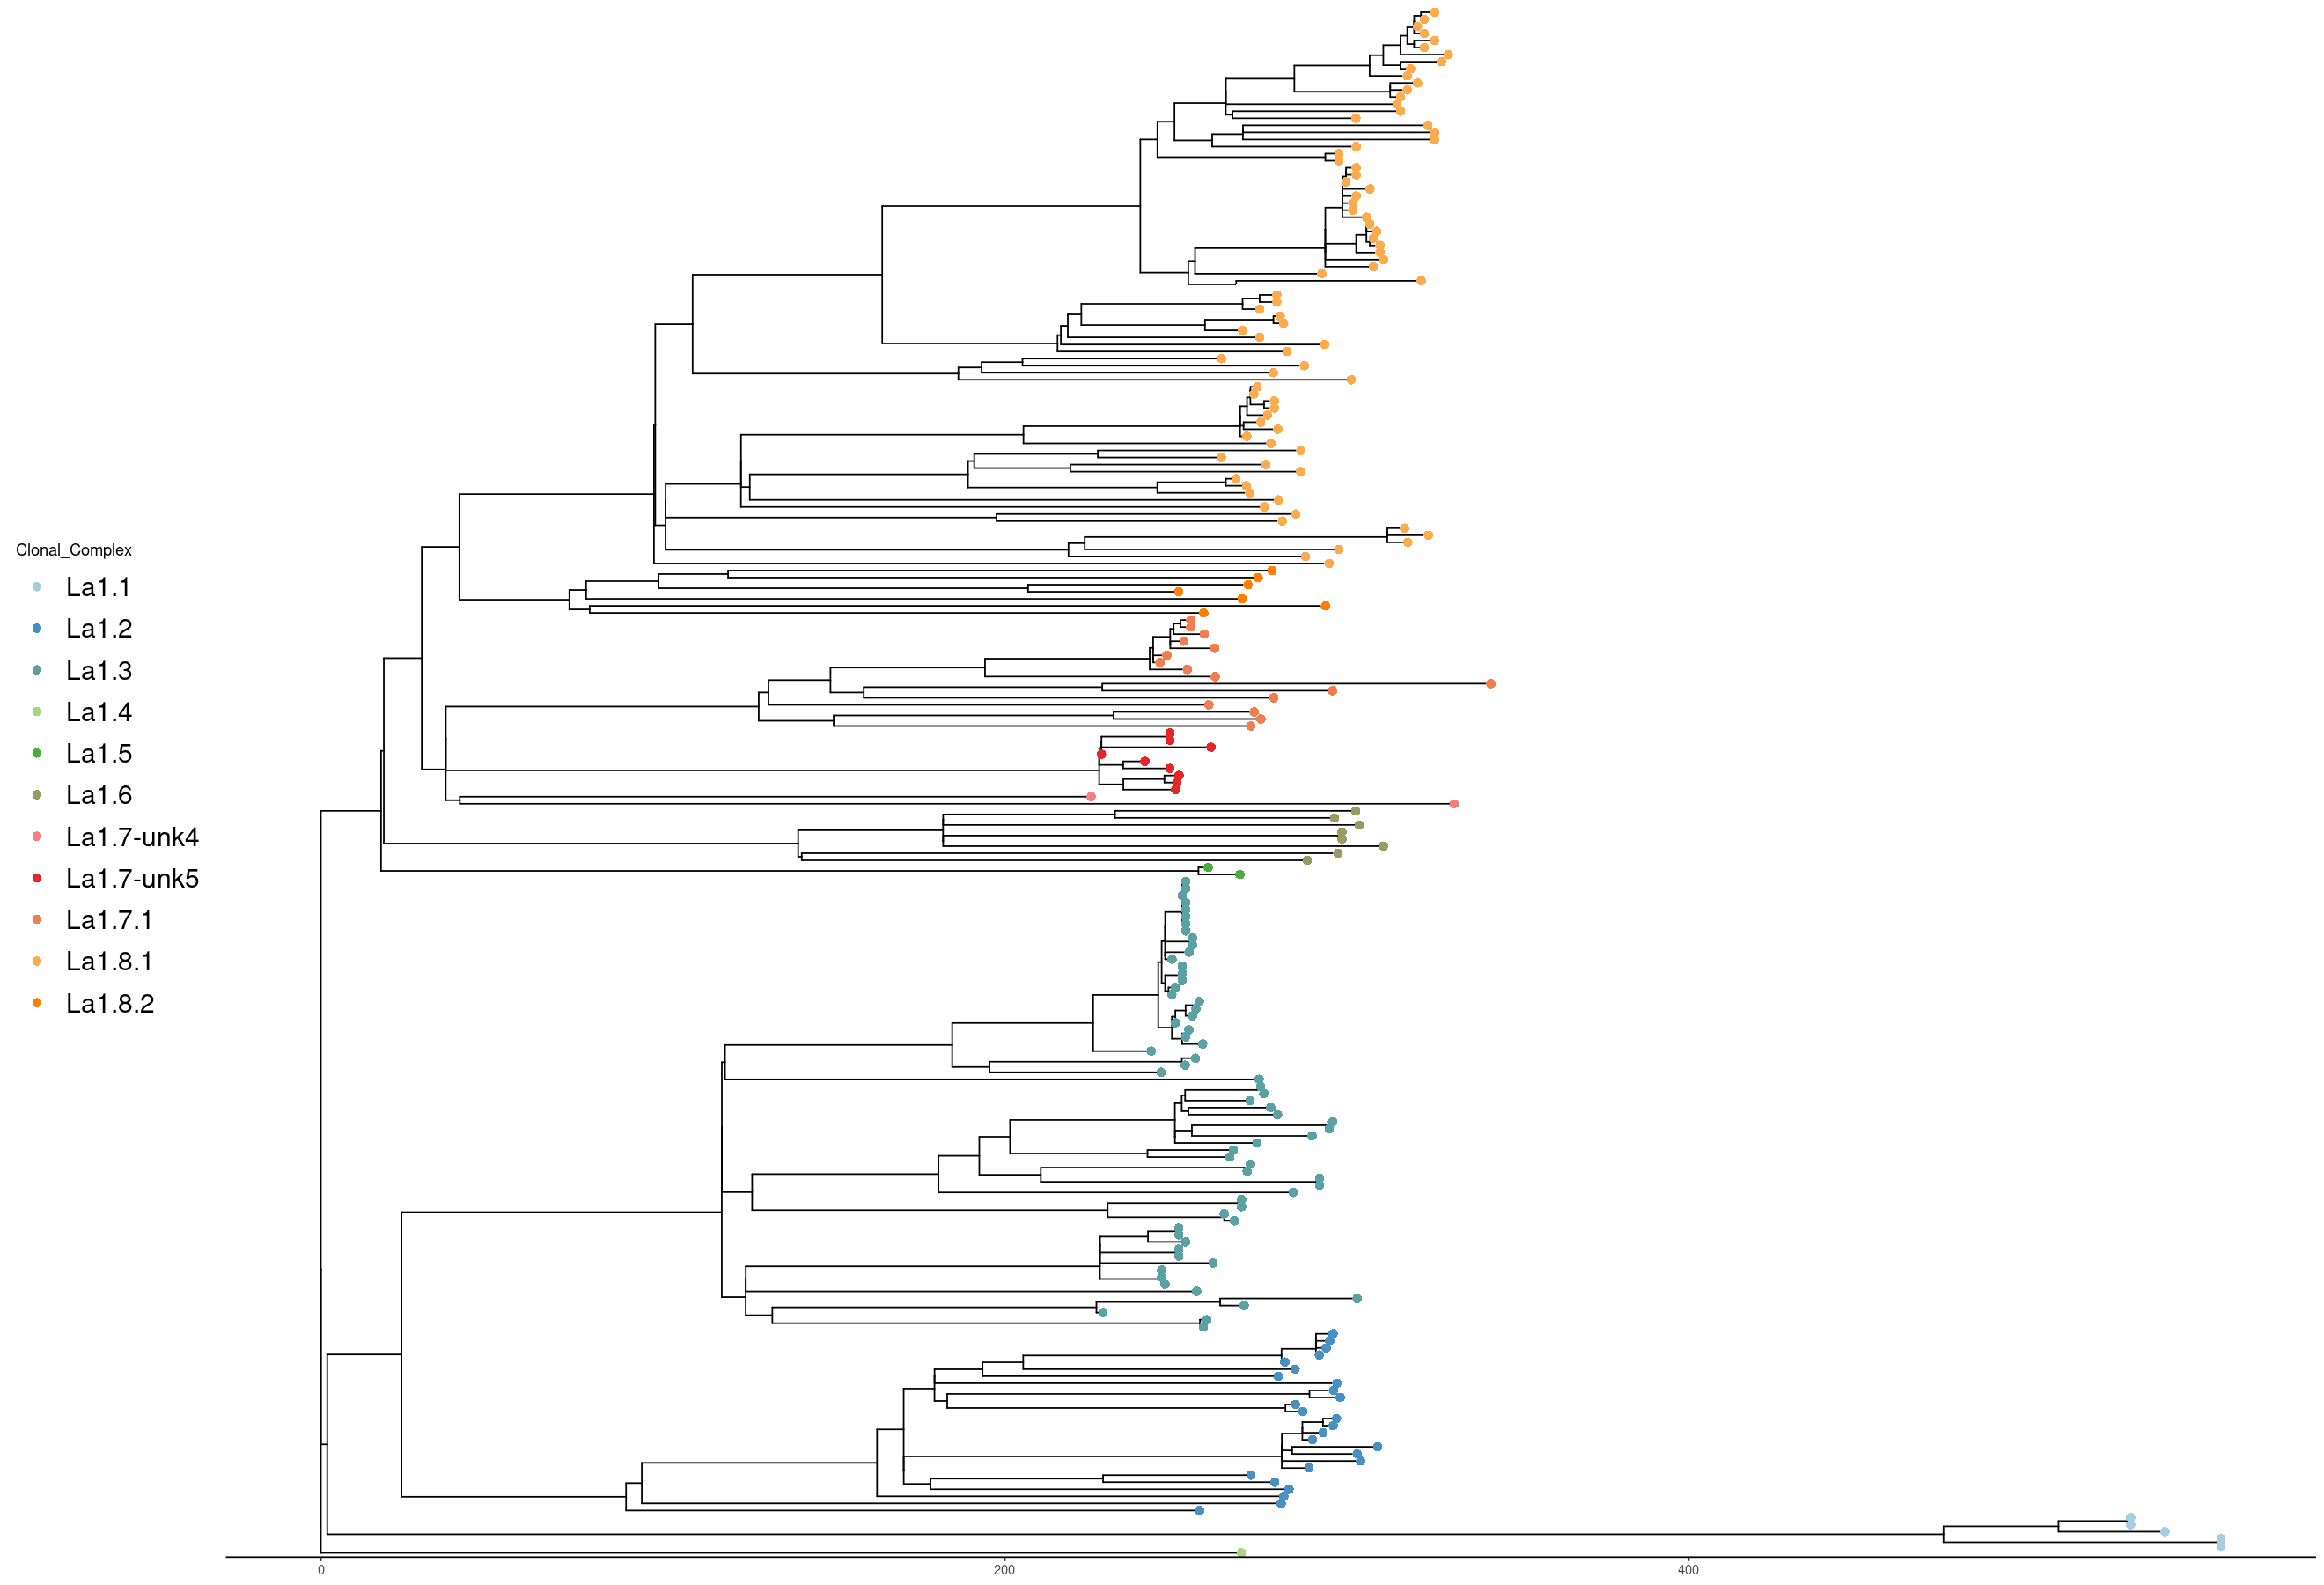

In [320]:
tips<-row.names(glmeta[glmeta$Clonal_Complex %in% c('La3','La2'),])
stree <- drop.tip(gltree, tips)
ggplottree(stree, glmeta, layout='rect', cols=c('Clonal_Complex'), cmaps=c('Paired'))

## combined

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


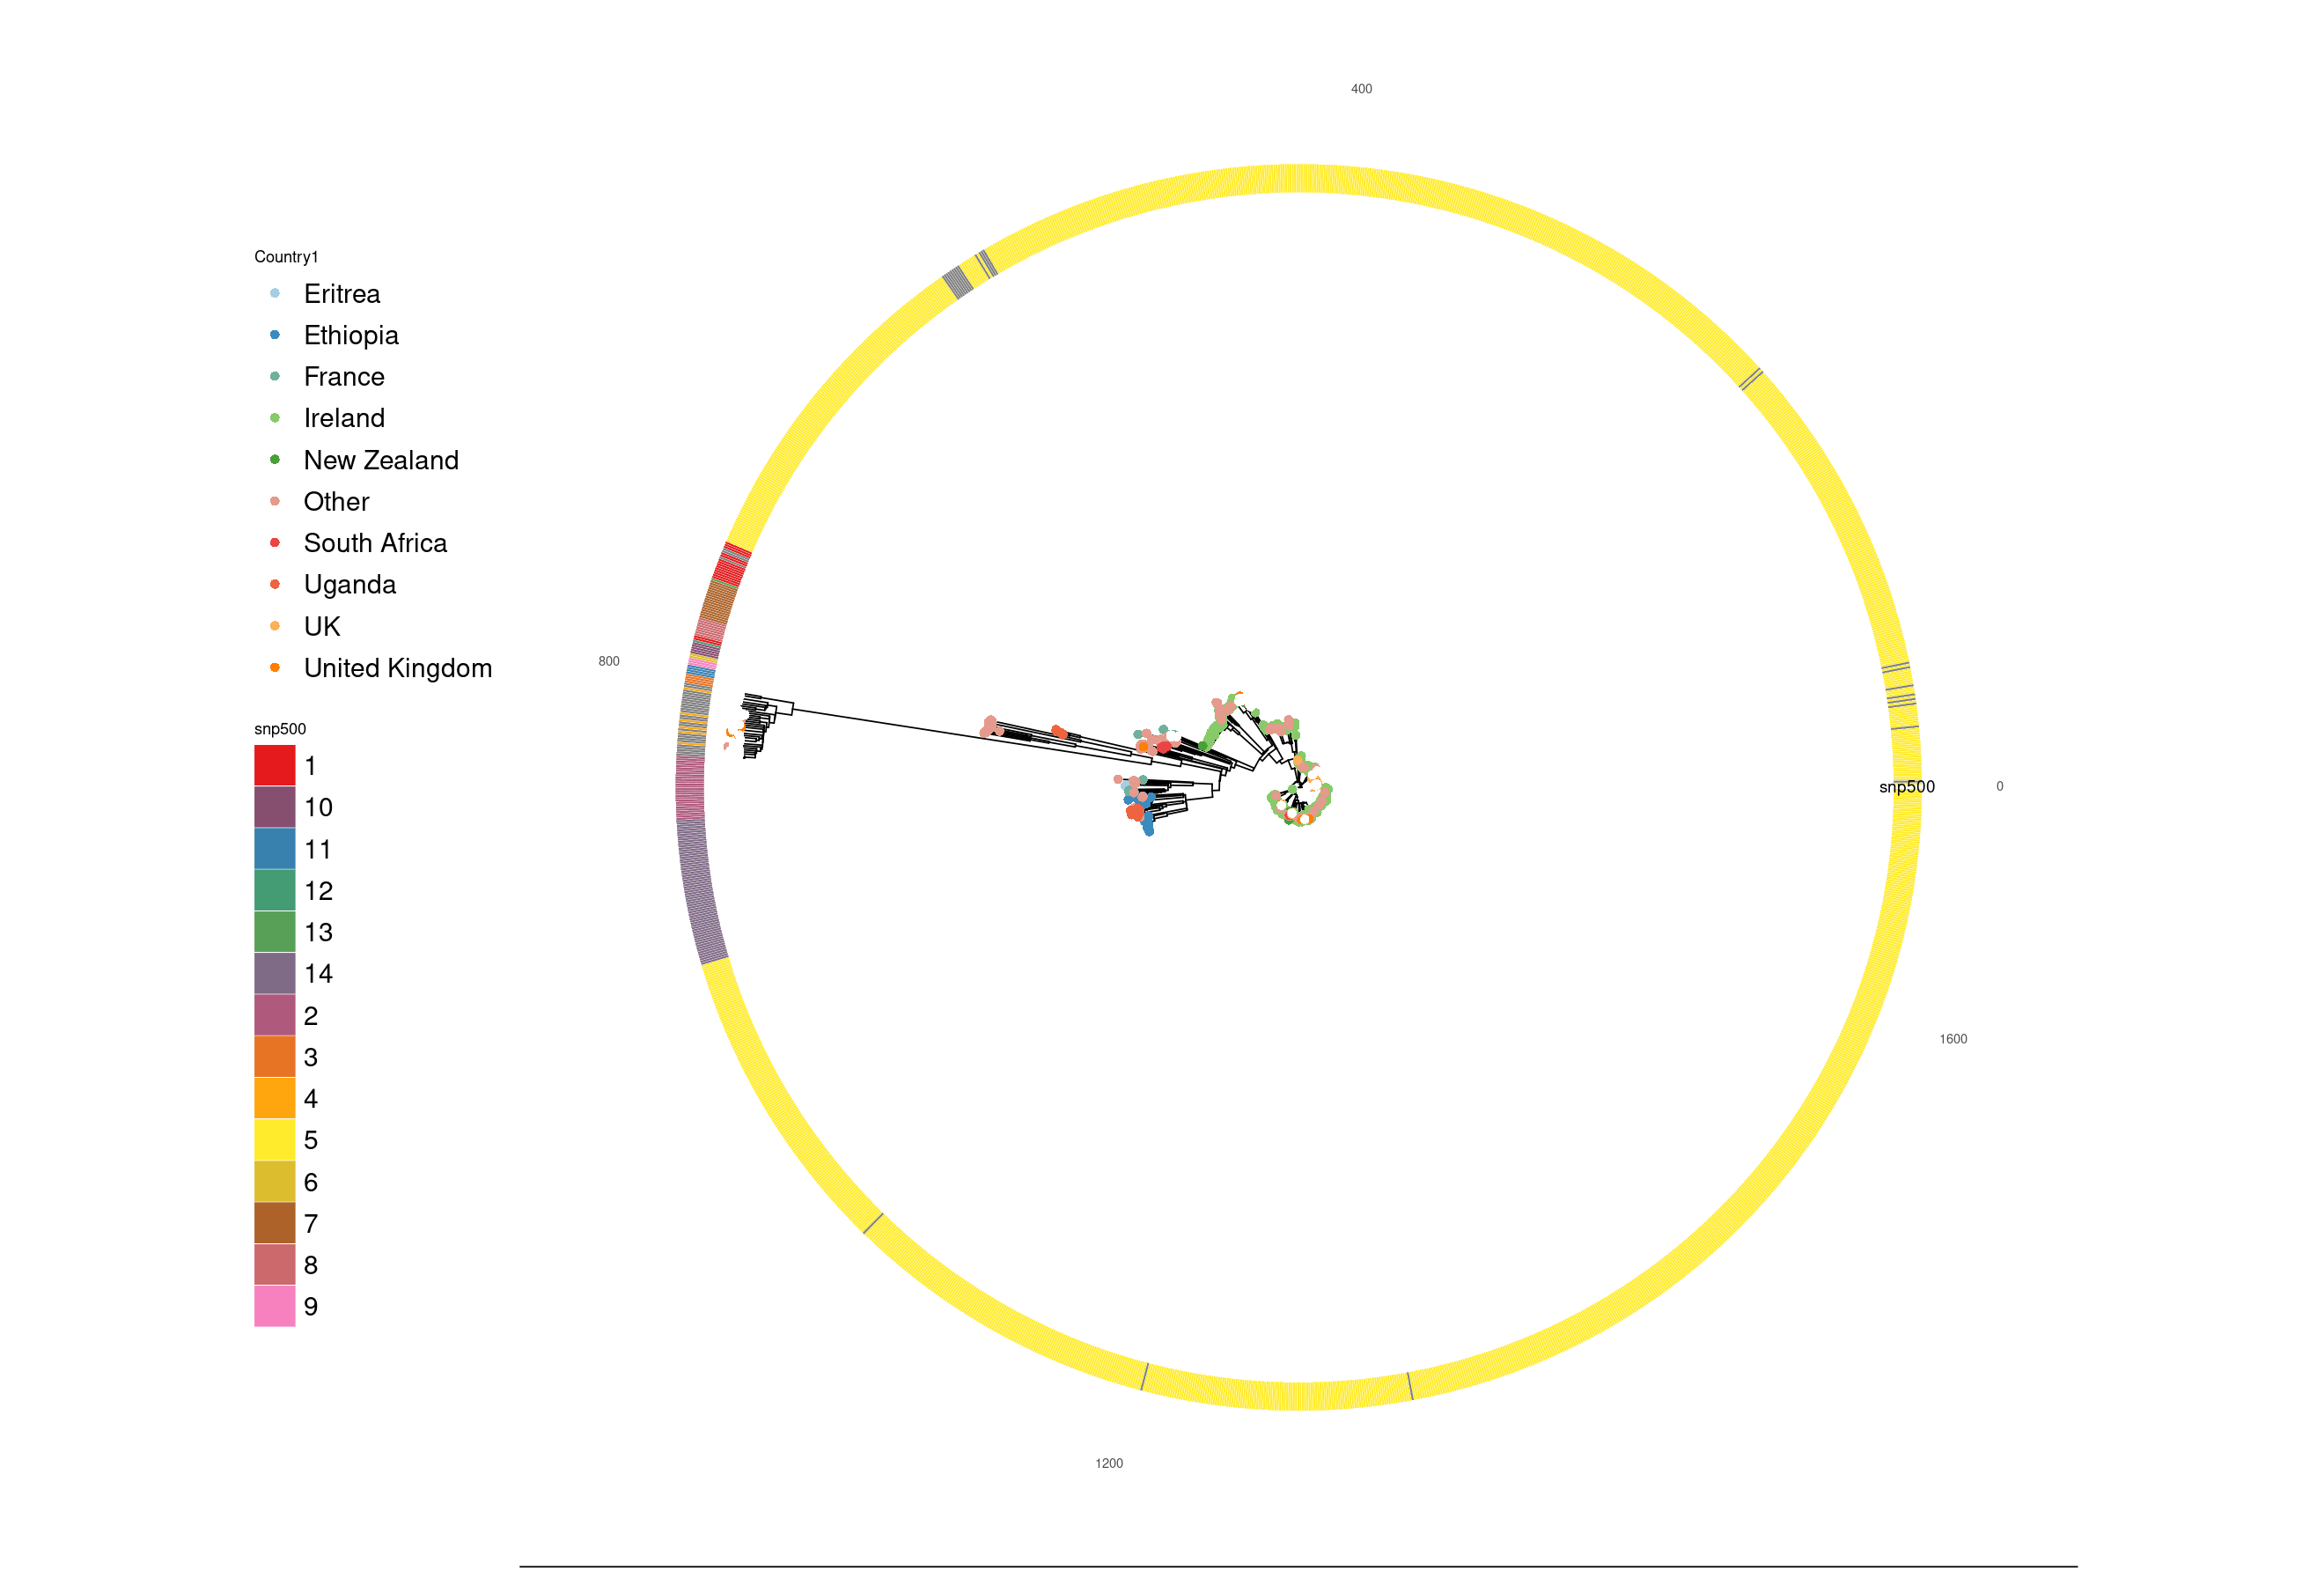

In [269]:
#tree<-root(combtree,'ERR2513607')
ggplottree(combtree, cmeta, layout='c', cols=c('Country1','snp500'), cmaps=c('Paired','Set1'))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


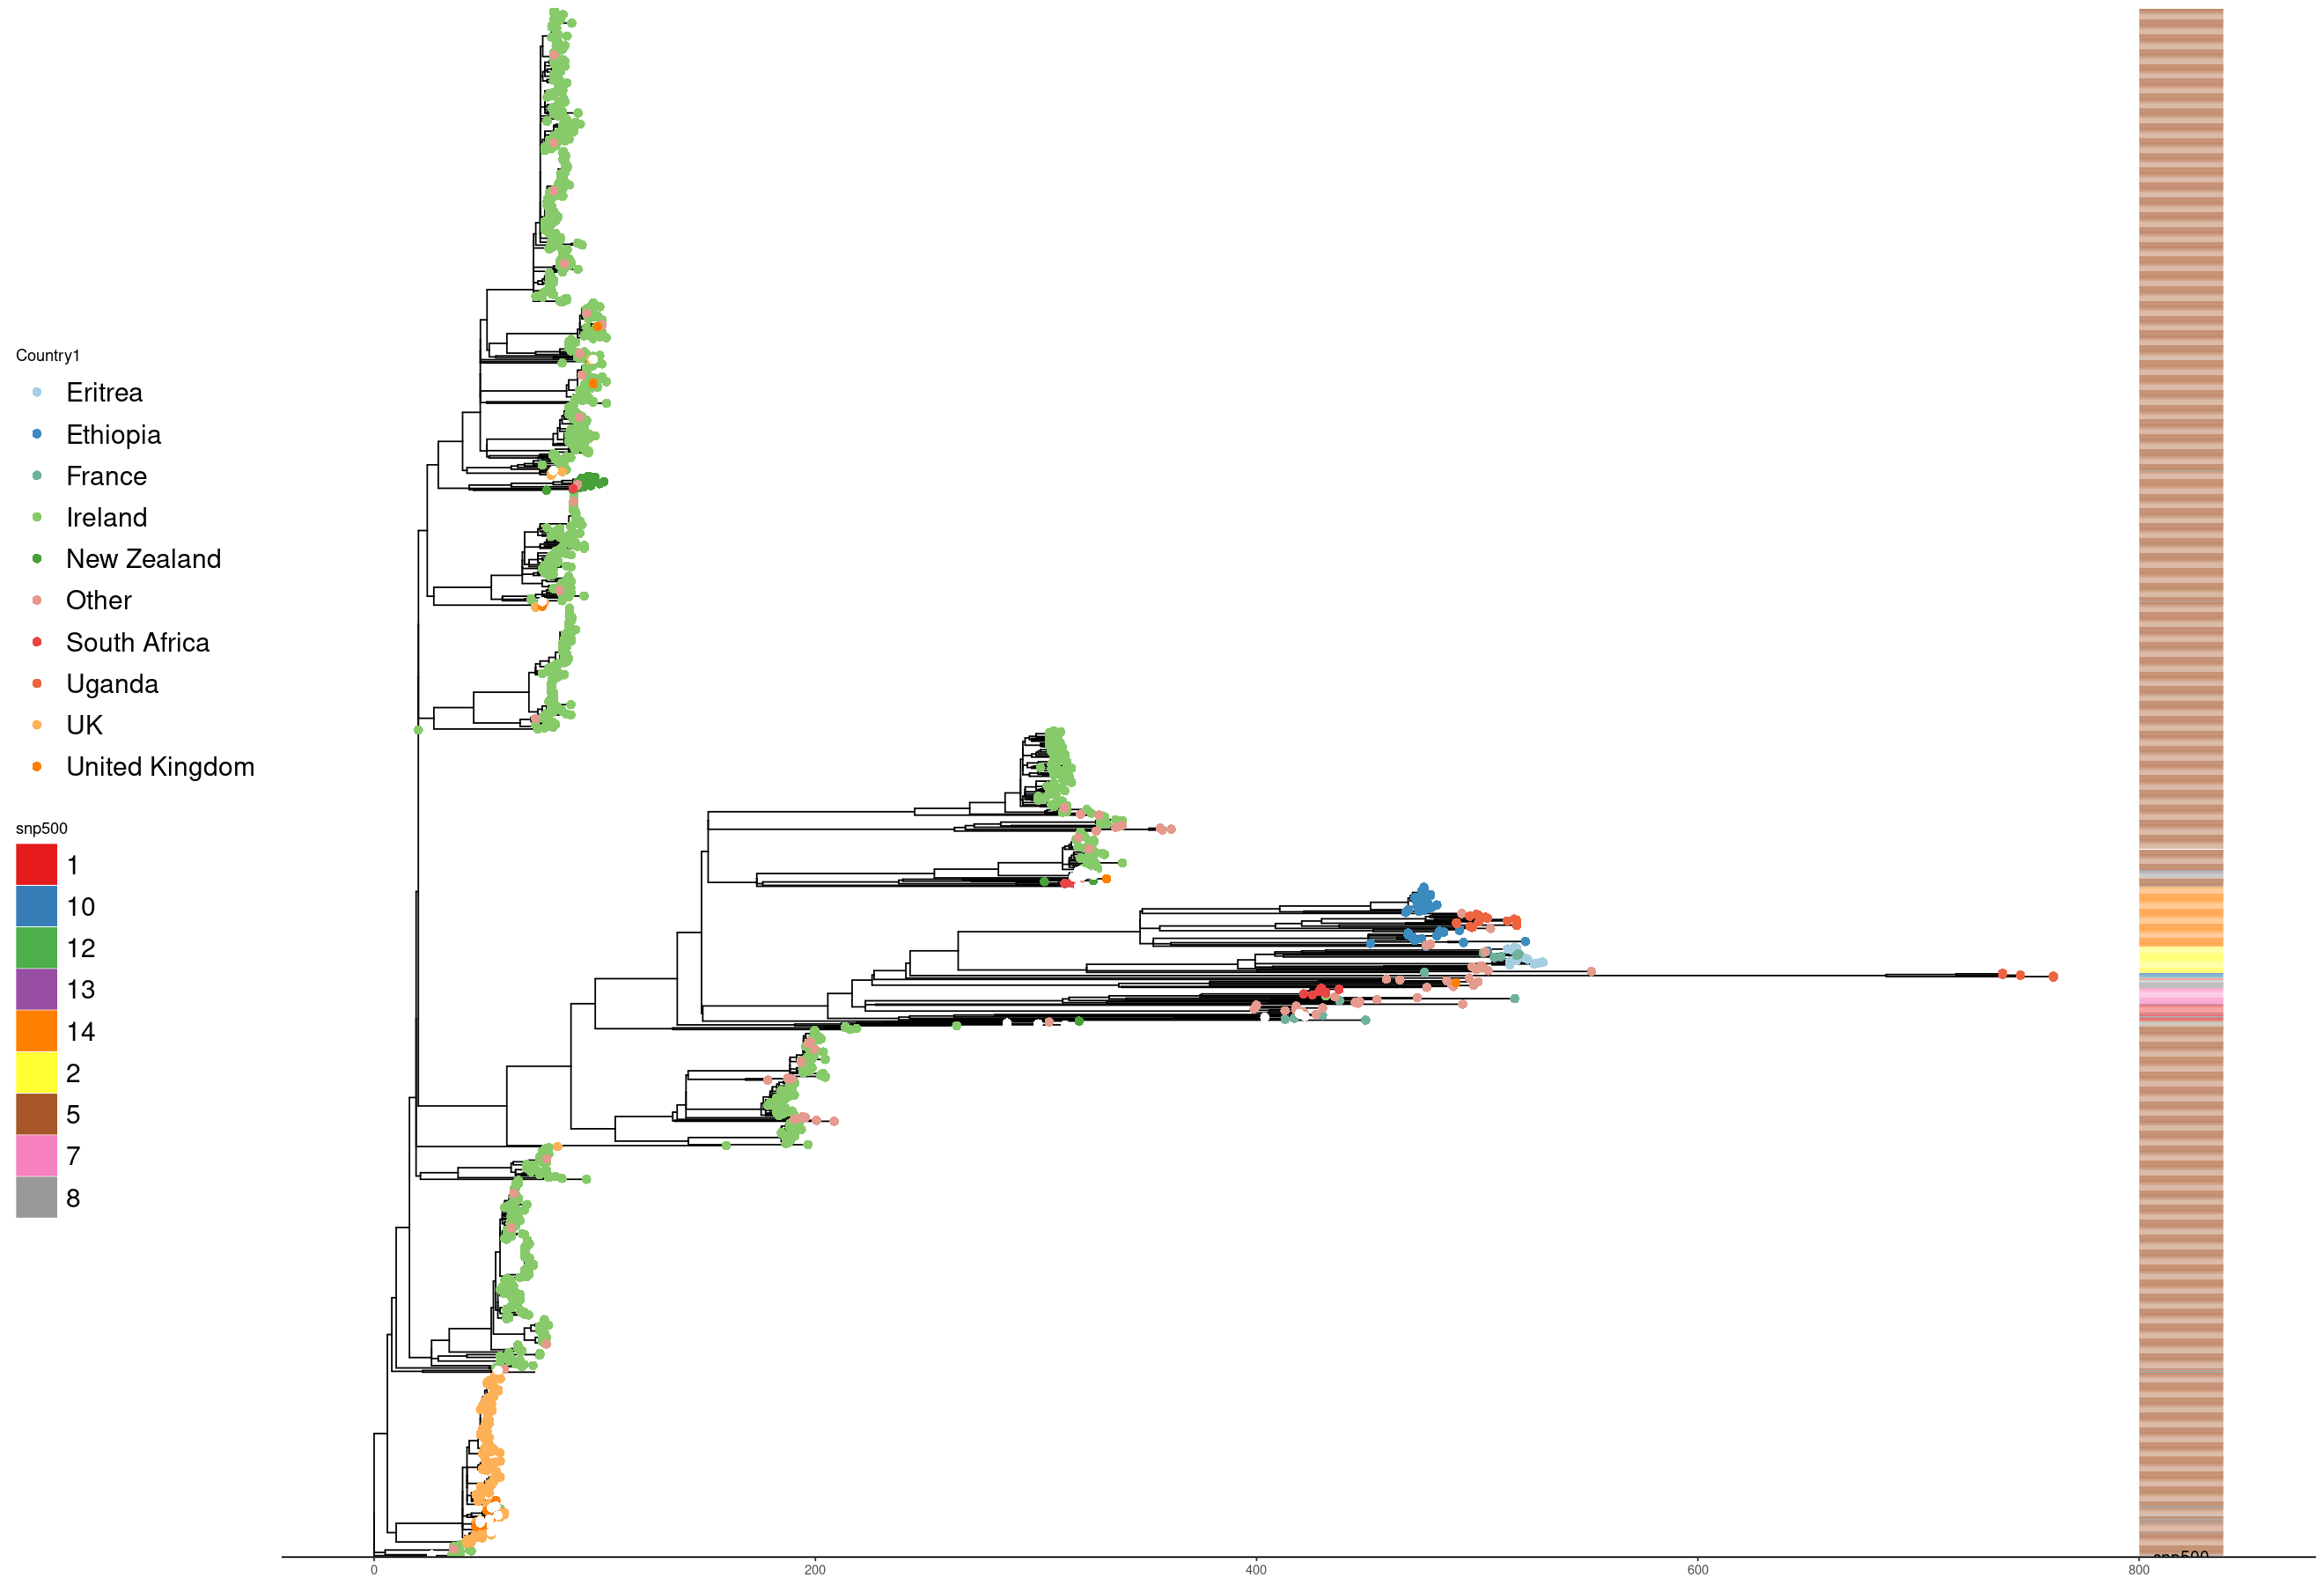

In [322]:
#randtips<-sample(combtree$tip.label,70)
#randtree <- keep.tip(combtree, randtips)
tips<-row.names(glmeta[glmeta$Clonal_Complex %in% c('La3','La2'),])
stree<-drop.tip(combtree,tips)
ggplottree(stree, cmeta, layout='rect', cols=c('Country1','snp500'), cmaps=c('Paired','Set1'))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


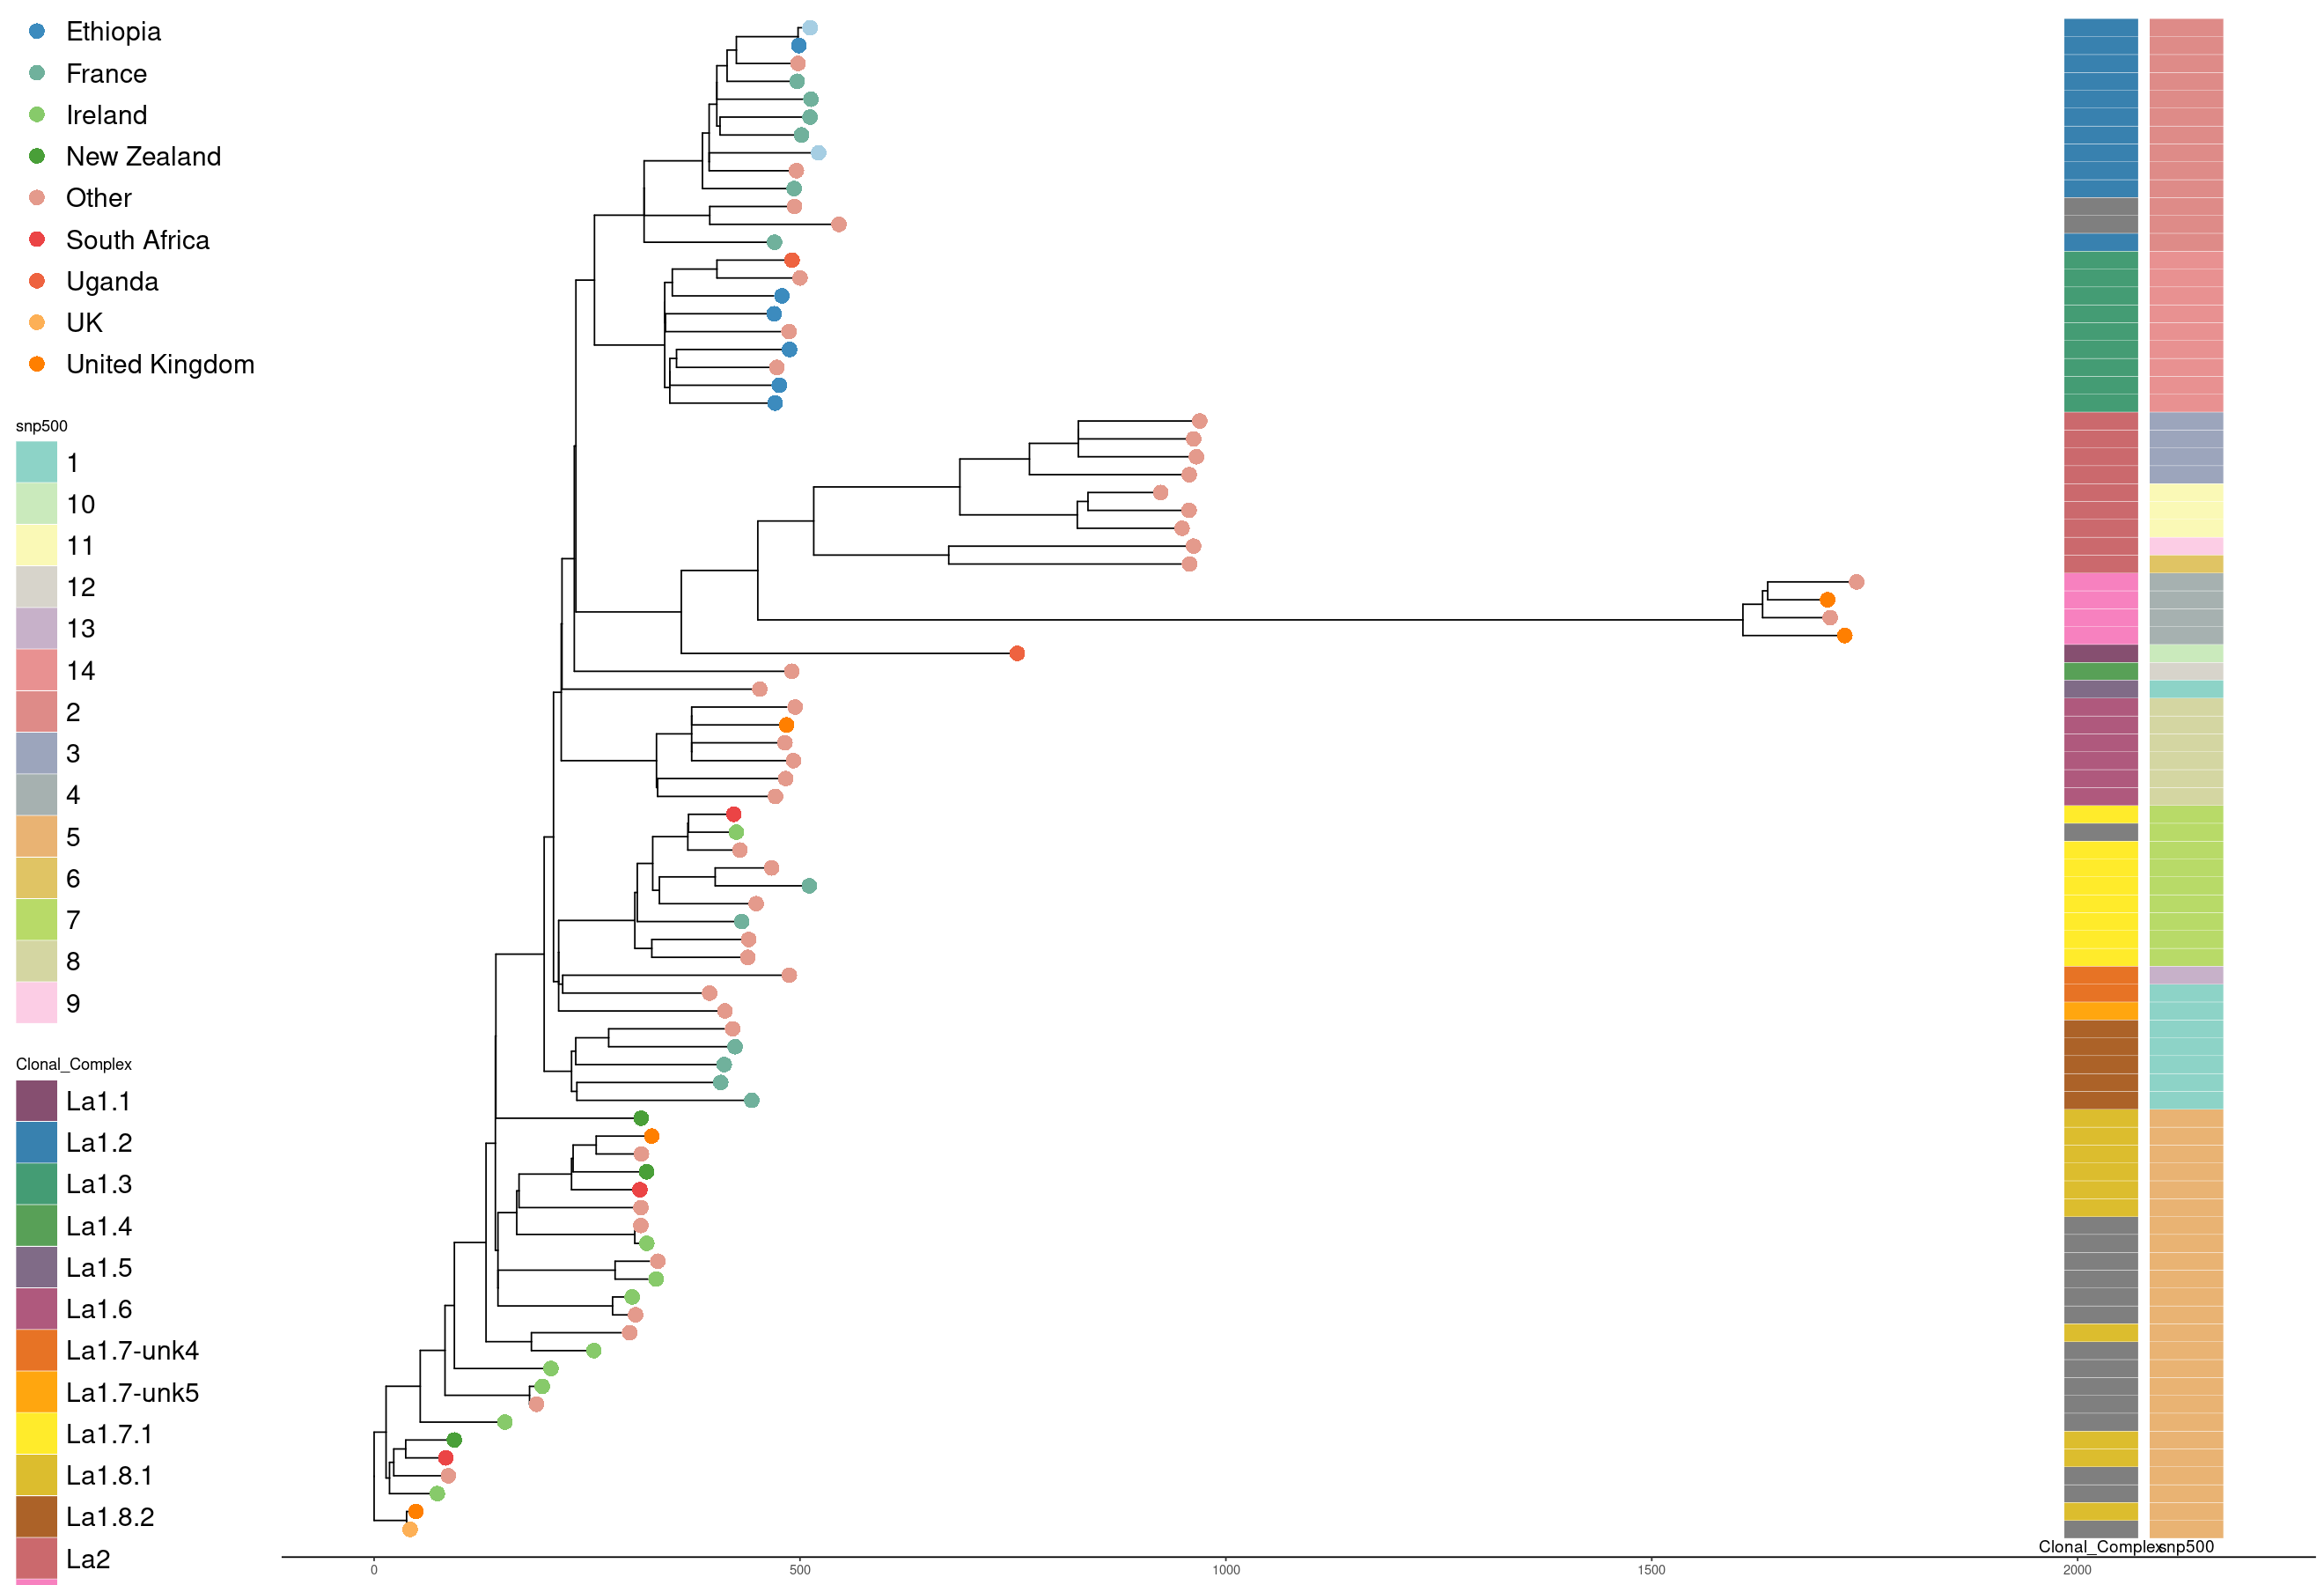

In [327]:
uniq <- row.names(distinct(cmeta,snp200,Country1,.keep_all = TRUE))
stree <- keep.tip(combtree, uniq)
ggplottree(stree, cmeta, layout='rect', cols=c('Country1','Clonal_Complex','snp500'), cmaps=c('Paired','Set1','Set3'), tipsize=5, offset=100)

In [323]:
p1<-ggplottree(stree, cmeta, layout='unrooted', cols=c('snp500'), cmaps=c('Set1'), tipsize=5)
p2<-ggplottree(stree, cmeta, layout='unrooted', cols=c('Clonal_Complex'), cmaps=c('Paired'), tipsize=5)
p1+p2

"daylight" method was used as default layout for unrooted tree.



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


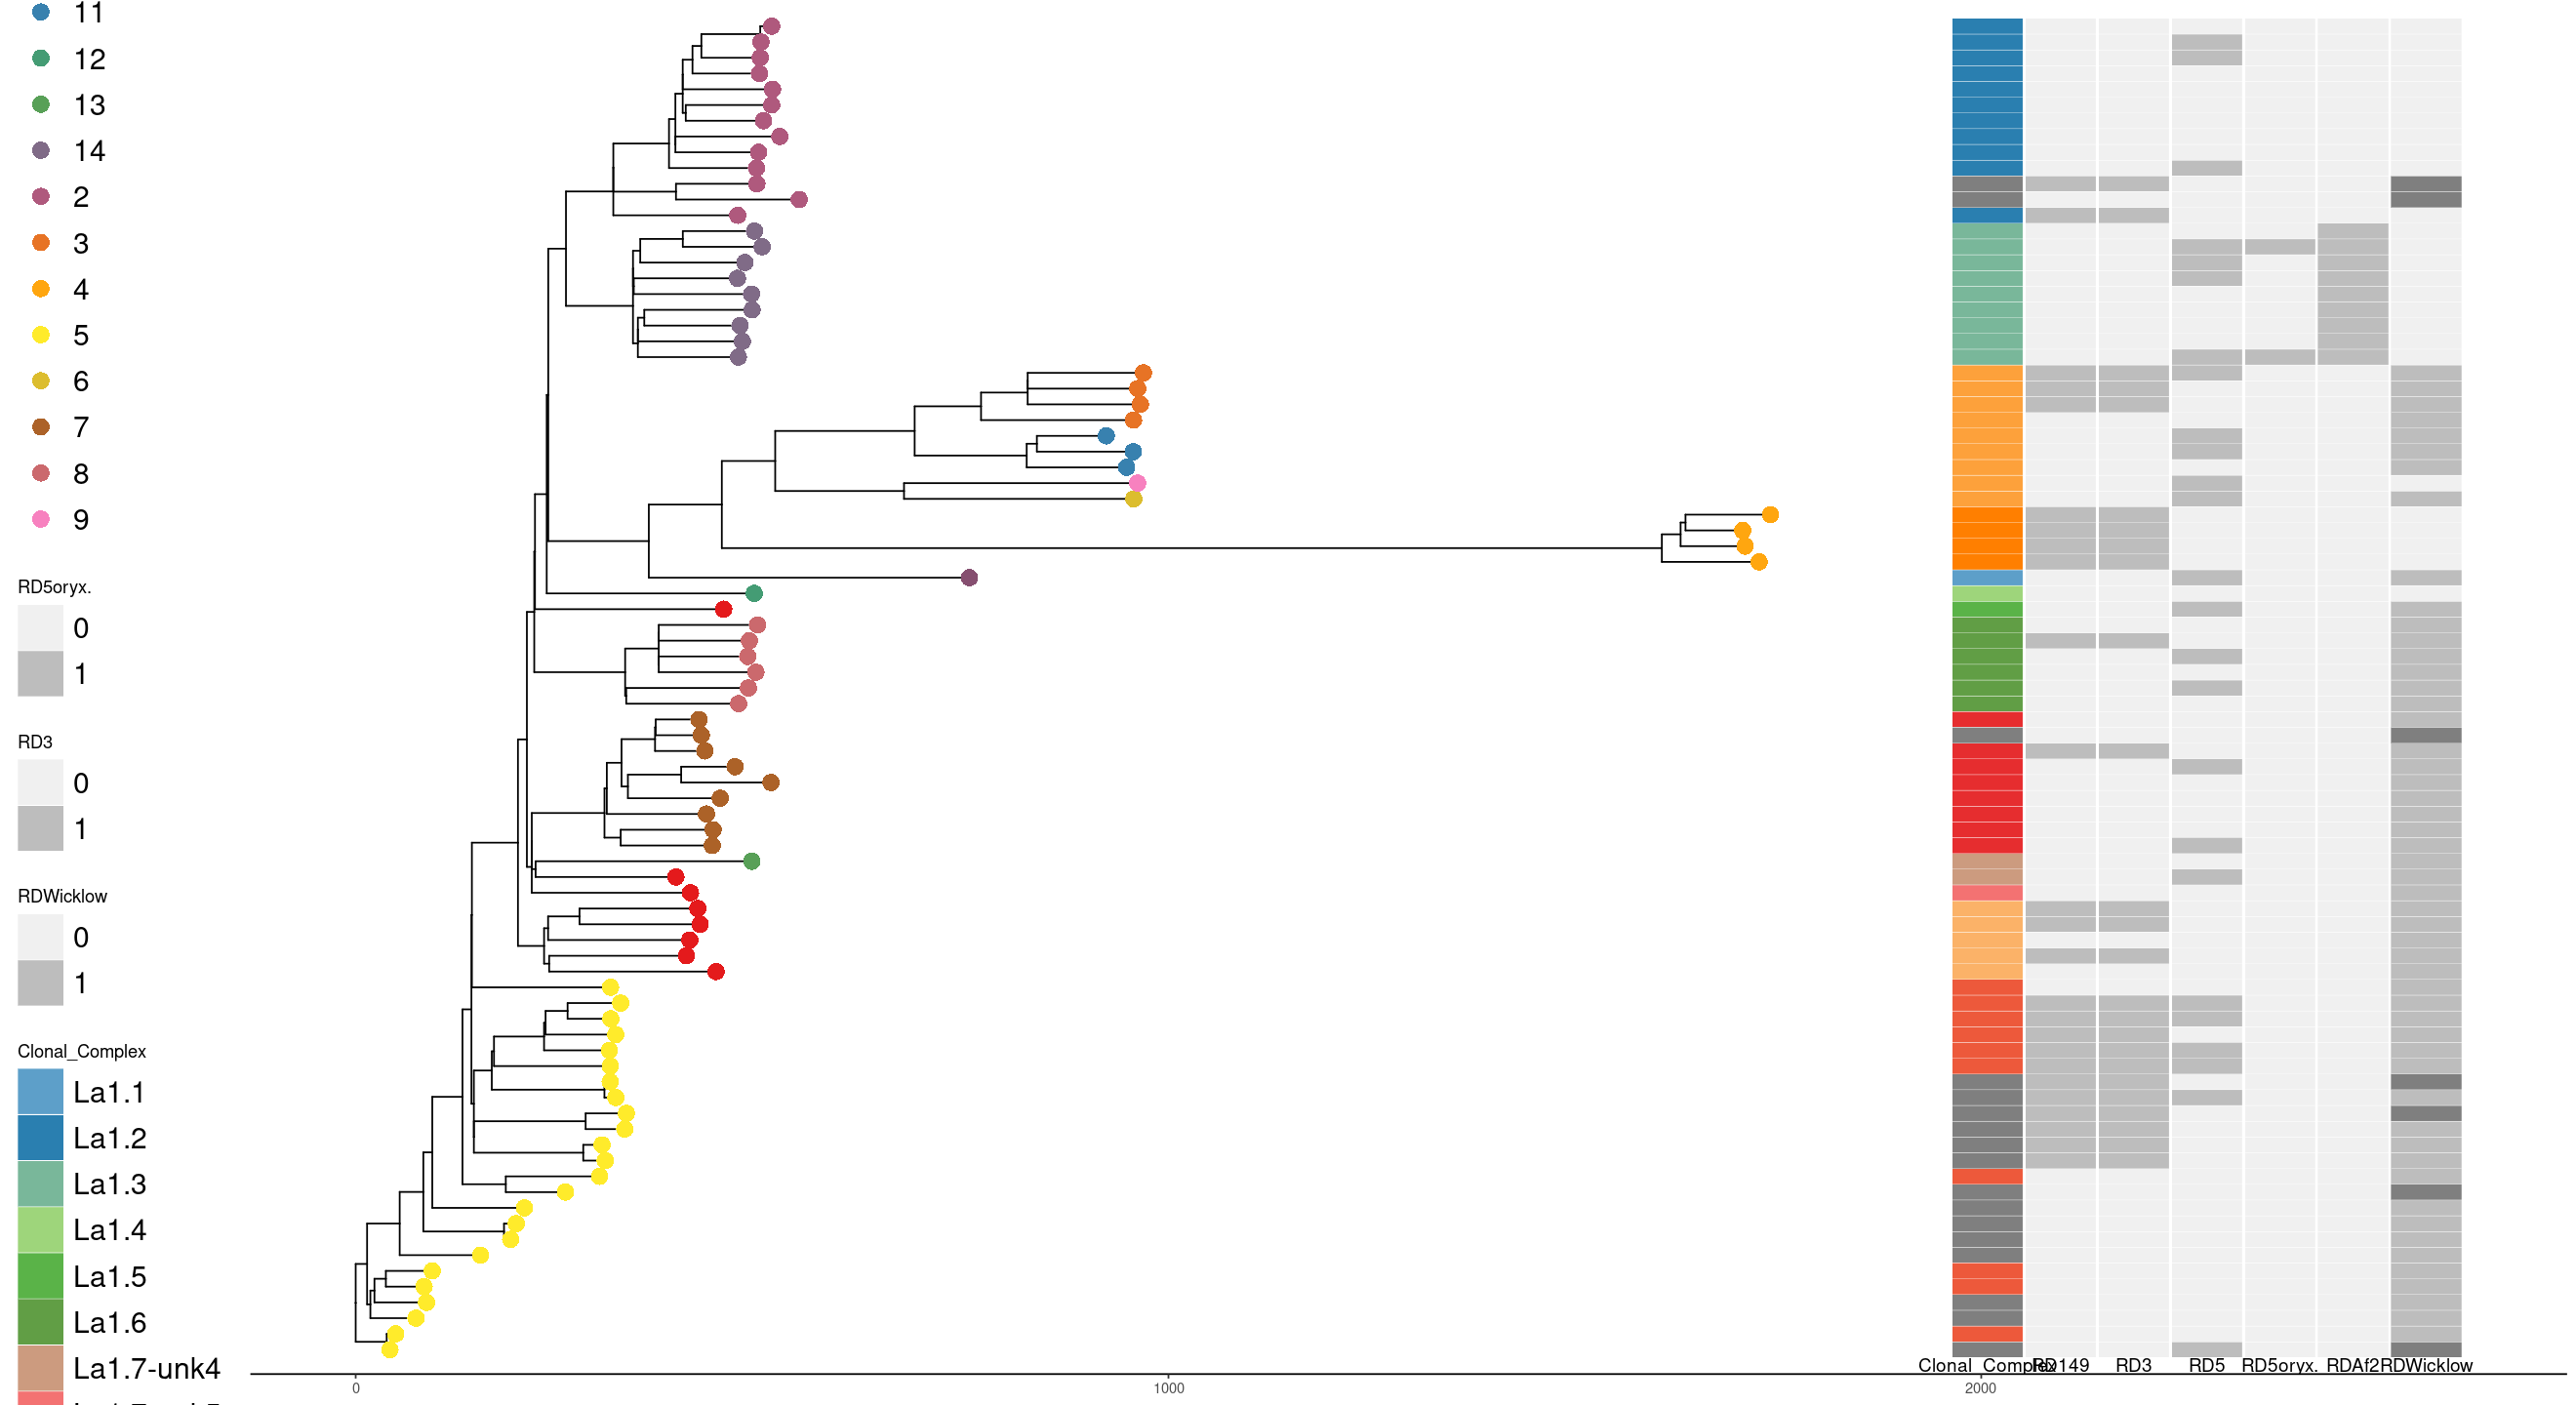

In [264]:
options(repr.plot.width=22, repr.plot.height=12)
h1<-c('snp500','Clonal_Complex')
h2<-c(h1,c('RD149','RD3','RD5','RD5oryx.','RDAf2','RDWicklow'))
cm1<-rep('Greys',length(h2))
cm<-c(c('Set1','Paired'),cm1)
ggplottree(stree, cmeta, layout='rect', cols=h2, cmaps=cm, tipsize=5, offset=90)

## Ireland

In [ ]:
options(repr.plot.width=22, repr.plot.height=14)
ggplottree(iretree,iremeta,cols=c('snp200','county2'),cmaps=c('Set1','Paired'),tipsize=2,layout='circular')

In [ ]:
common200<-c(3,1,4,7,5,2)
tips<-row.names(iremeta[iremeta$snp200 %in% common200,])
stree<-keep.tip(iretree,tips)

options(repr.plot.width=22, repr.plot.height=10)
ggplottree(stree,iremeta,cols=c('Country','snp200'),cmaps=c('Accent','Set1'),layout='rect',tipsize=2,offset=15)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


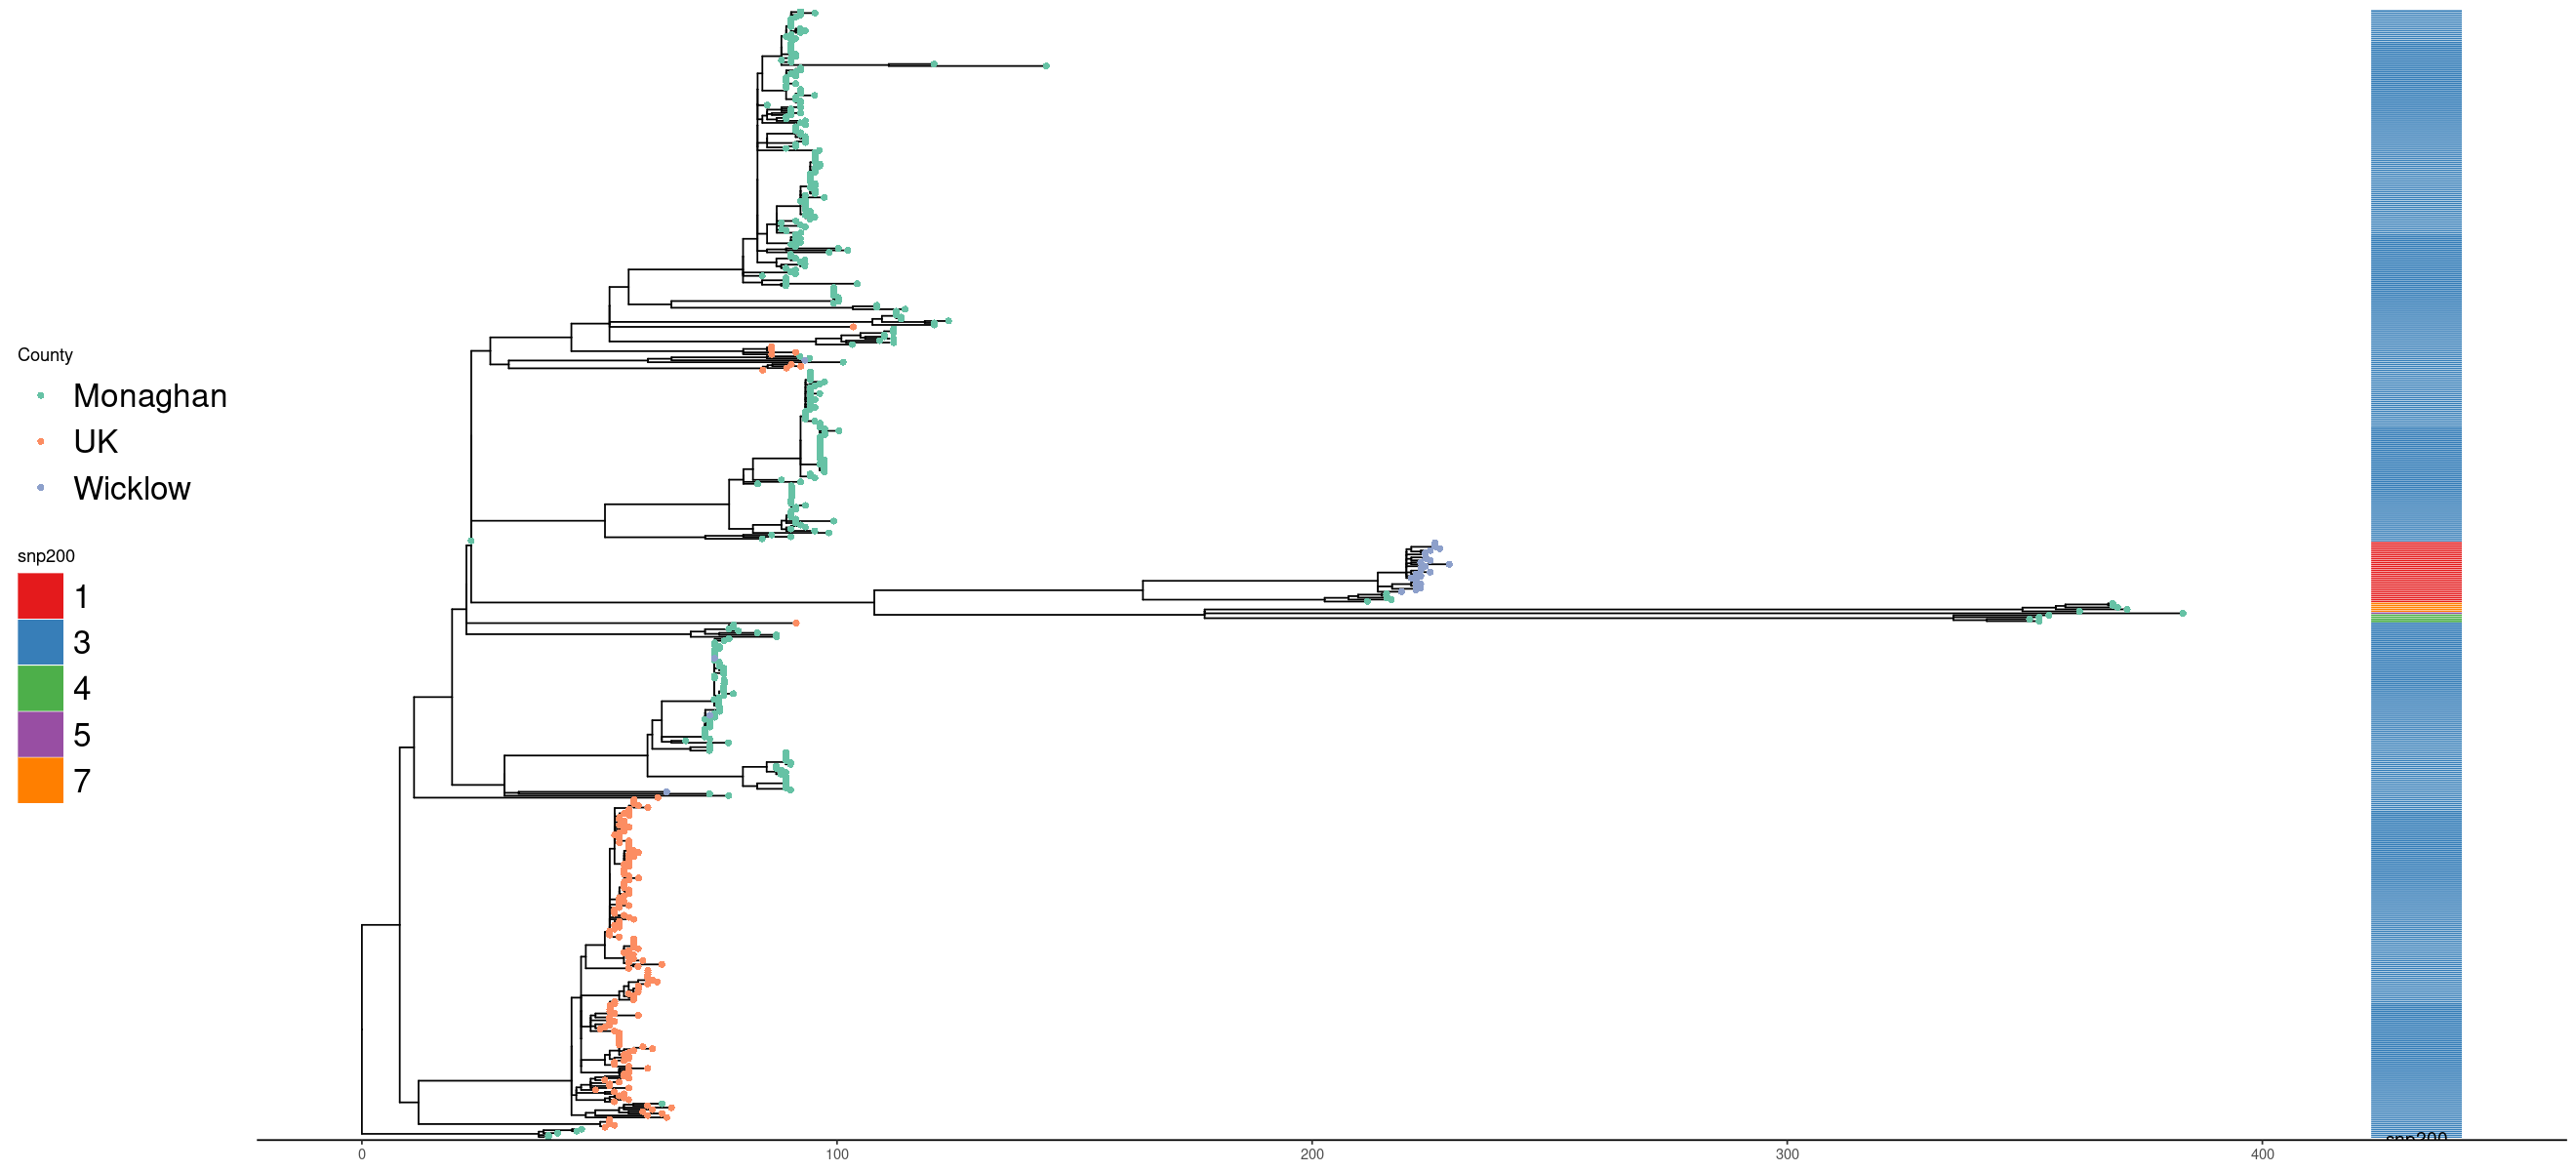

In [112]:
counties=c('Monaghan','Wicklow','UK')
tips<-row.names(iremeta[iremeta$County %in% counties,])
stree<-keep.tip(iretree,tips)

options(repr.plot.width=22, repr.plot.height=10)
ggplottree(stree,iremeta,cols=c('County','snp200'),cmaps=c('Set2','Set1'),layout='rect',tipsize=2,offset=15)

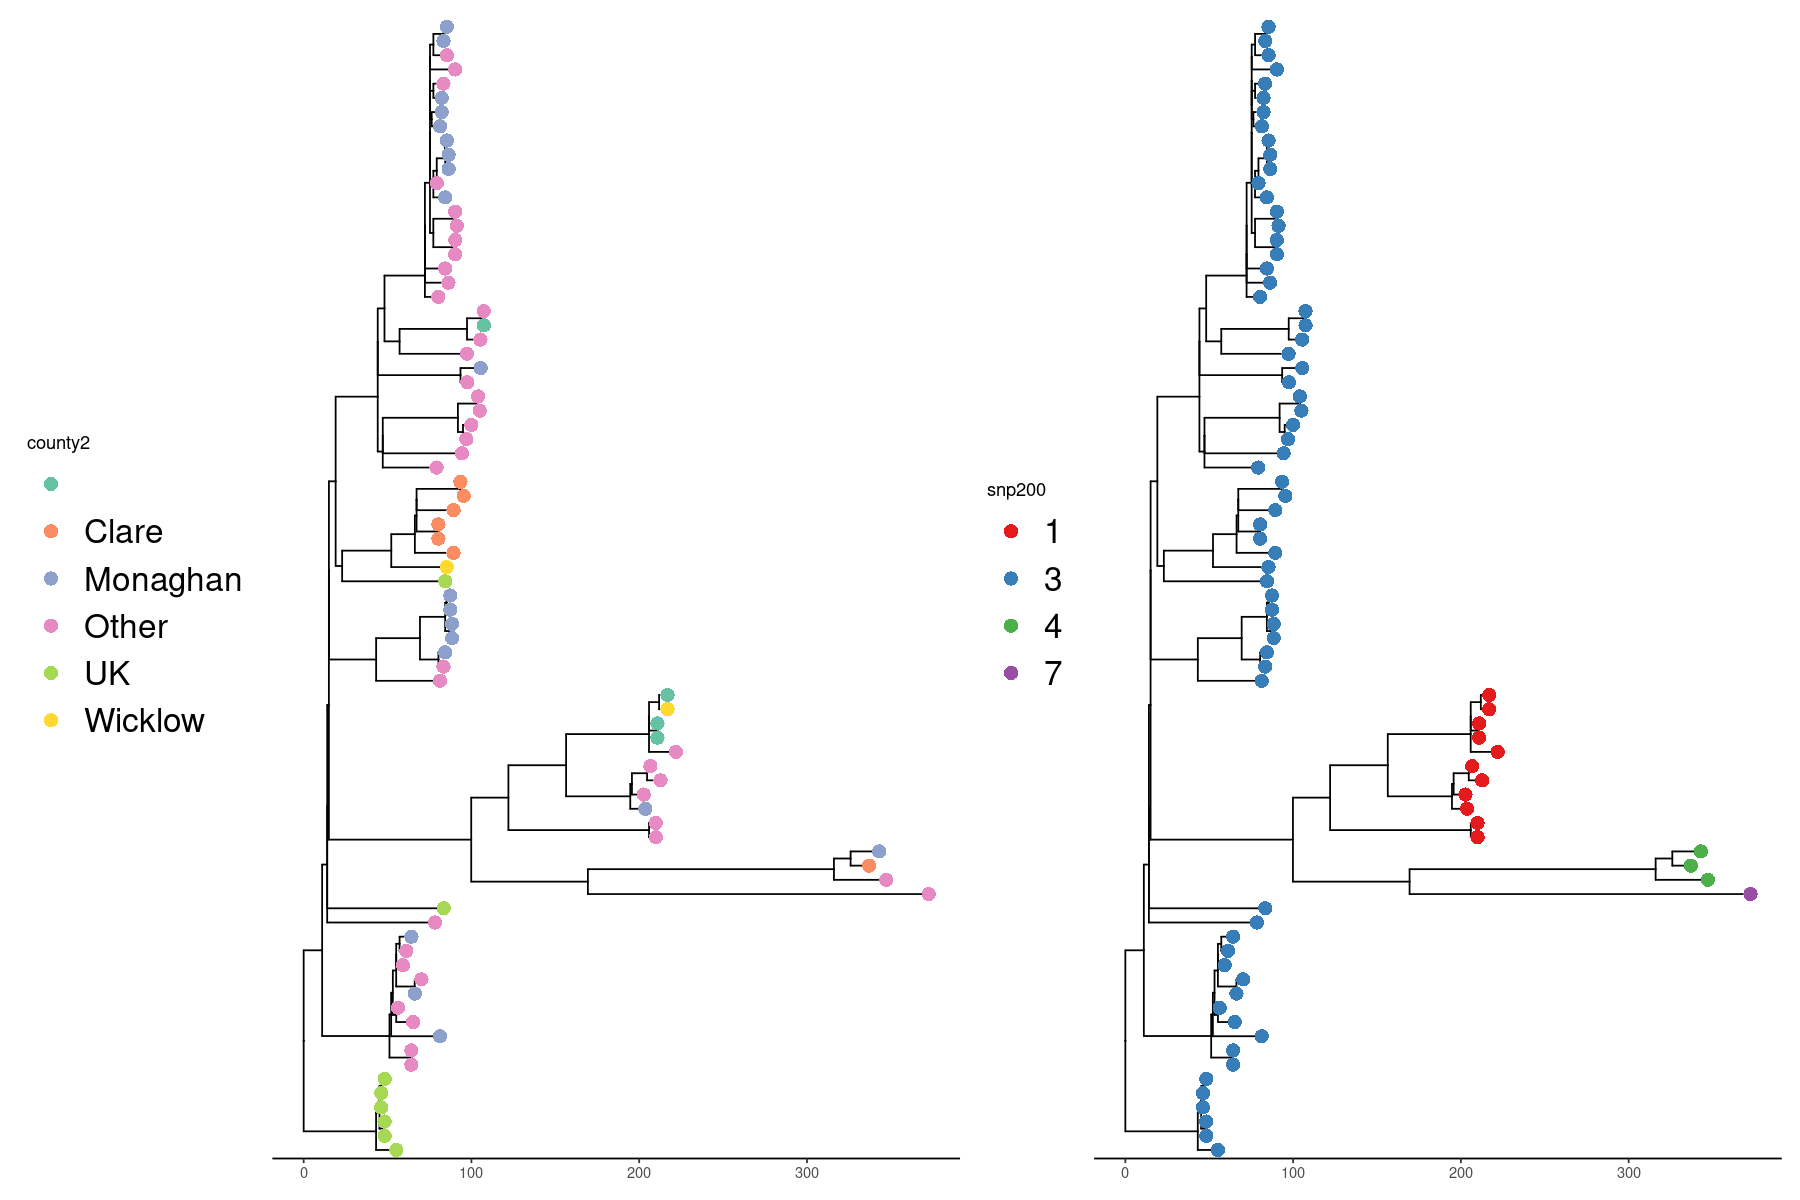

In [116]:
options(repr.plot.width=25, repr.plot.height=10)
#set.seed(1)
randtips<-sample(iretree$tip.label,80)
randtree <- keep.tip(iretree, randtips)
options(repr.plot.width=15, repr.plot.height=10)
p1<-ggplottree(randtree, iremeta, layout='rect','county2', cmap='Set2', tipsize=4)
p2<-ggplottree(randtree, iremeta, layout='rect','snp200', cmap='Set1', tipsize=4)
p1+p2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


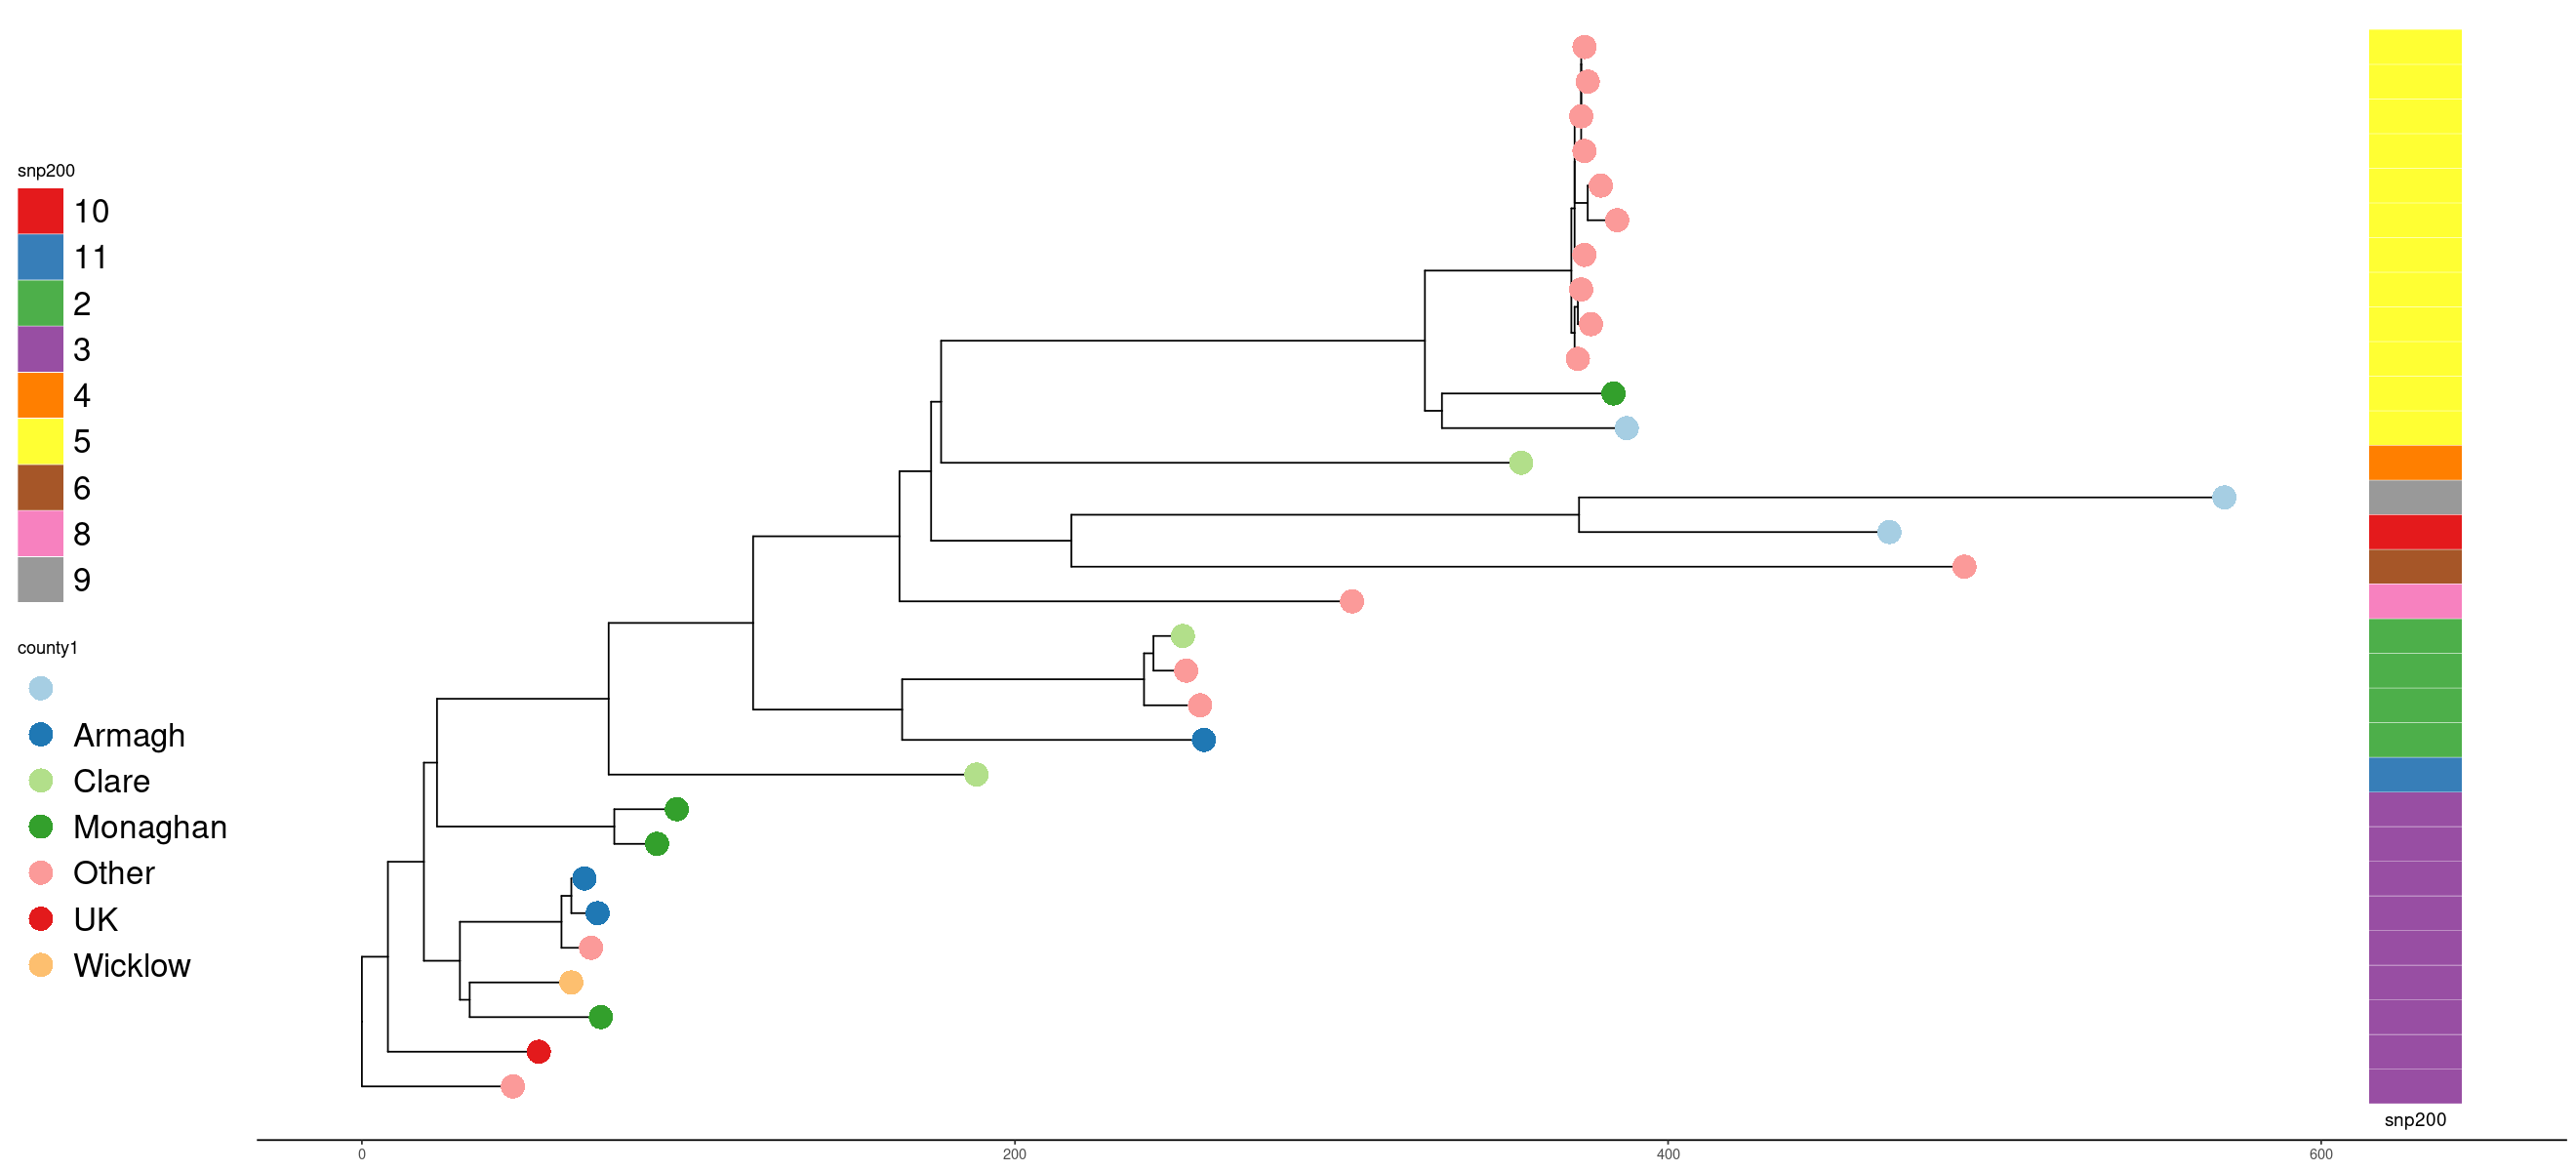

In [115]:
rare<-c(5, 2, 10, 6, 9, 11, 8)
tips<-row.names(iremeta[iremeta$snp200 %in% rare,])
tips <- c(tips,sample(iretree$tip.label,10))
stree<-keep.tip(iretree,tips)

options(repr.plot.width=22, repr.plot.height=10)
ggplottree(stree,iremeta,cols=c('county1','snp200'),cmaps=c('Paired','Set1'),layout='rect',tipsize=7,offset=15)

In [ ]:
tips<-row.names(meta2[meta2$county %in% c('Monaghan'),])
tips<- c('011-Bov-2000-12.140','018-Bov-2003-18.129','023-Bov-2004-6.263','034-Bov-2004-24.130','112-Bov-2007-19.140','115-Bov-2007-18.129',
         '19-2438','19-4281','378-Bov-2017-11.145','461','TB20-007278','TB20-008269','TB20-010920','TB20-011622')
stree<-keep.tip(iretree,tips)
ggplottree(stree,meta2,'snp50',layout='rect',cmap='Set1',tiplabel=TRUE)

## combined, global + Ireland

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
tips<-row.names(meta[(meta$cc %in% c('La2','La3')),])
stree <- drop.tip(mltree, tips)
p<-ggplottree(stree, meta, layout='rect', 'cc','Country1', cmap='Paired')
labels <- list(Wicklow=360,Monaghan=339,NI_Monaghan=321,NI=561)
labelclades(p, labels)

In [ ]:
ggplottree(stree, meta, layout='unrooted', 'cc', cmap='Paired')

In [ ]:
#plot_tree(mltree,meta,column='SB1',cmap='Set1')
p<-ggplottree(mltree, meta, 'county1', 'snp100')
labelclades(p)

In [ ]:
#clustered samples only
snp100cl <- c(4, 5, 9, 8, 18, 15, 6, 7, 33, 37, 32, 28, 20, 42, 29, 17, 22, 13)
snp50cl <- c(19, 7, 21, 34, 25, 46, 56, 49, 9, 65, 28, 33, 43, 47, 12, 24, 14, 40)
snp12cl <- c(36, 72, 35, 46, 21, 38, 37, 52, 39, 16, 51, 82, 74, 22, 19, 73, 60, 8, 48)
tips<-row.names(meta[(meta$snp100 %in% snp100cl),])
itree <- keep.tip(mltree, tips)
ggplottree(subtree, meta, 'county1',  'SB1', layout='rect',cmap='Paired',title='global samples, snp50 clusters')

In [555]:
ggplottree(itree, meta, 'Country', cmap='Spectral', title='global samples, snp100 clusters',layout='unrooted')

"daylight" method was used as default layout for unrooted tree.



In [ ]:
#kevin misc
misctree <- read.tree('/storage/btbgenie/misc_results/tree.newick')
#tips <- c('TB20-002600','TB20-001797','TB20-002596')
tips <- c('TB19-003021', 'TB19-003030', 'TB19-003361', 'TB19-003397', 'TB19-003449', 'TB19-003531', 'TB19-003601', 'TB19-003651', 'TB19-003791', 'TB19-003797', 
          'TB19-003807', 'TB19-003842', 'TB19-003880', 'TB19-003881', 'TB19-004269', 'TB19-004809', 'TB19-004859', 'TB19-005148', 'TB19-005164', 'TB19-005339',
          'TB19-005507', 'TB19-005705', 'TB19-005742', 'TB19-005801', 'TB19-005959', 'TB19-006145', 'TB19-006148', 'TB19-008448', 'TB20-001475', 'TB20-011612')

stree <- keep.tip(misctree, tips)
ggplottree(stree,meta2,'snp3',cmap='Set1',layout='rect',tipsize=5,tiplabel=TRUE)